# Week 8 exercise 3: Multi-panel plot
EAS2655

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs

# if you get errors to import these packages , you will need to install them in Anaconda
# in anaconda command prompt (windows) or terminal (mac/linux) 
# Activate your environment, then type:
# conda install cartopy xarray  

## Mini project # 4: Make a multiple panel plot 

In [2]:
ds=xr.open_dataset('./air.mon.mean.nc')

# extract surface air temperature data for 1948 to 2020
TMP_NCEP1=ds.air.sel(time=slice("1948-01-01","1957-12-01"))
TMP_NCEP2=ds.air.sel(time=slice("2011-01-01","2020-12-01"))

# Select JAN data for every year and average
TMP_NCEP_JAN1=TMP_NCEP1.sel(time=TMP_NCEP1['time.month']==1).mean(dim='time')
TMP_NCEP_JAN2=TMP_NCEP2.sel(time=TMP_NCEP2['time.month']==1).mean(dim='time')

# Select JULY data for every year and average
TMP_NCEP_JUL1=TMP_NCEP1.sel(time=TMP_NCEP1['time.month']==7).mean(dim='time')
TMP_NCEP_JUL2=TMP_NCEP2.sel(time=TMP_NCEP2['time.month']==7).mean(dim='time')


# X=np.append(TMP_NCEP_mean.lon.values,360)
# Y=np.append(TMP_NCEP_mean.lat.values,-90)
X=ds.lon.values
Y=ds.lat.values

# grid boundaries
Xb=np.arange(-2.5/2, 360,2.5)
Yb=np.arange(90-2.5/2, -90,-2.5)
Yb=np.append(90,Yb)
Yb=np.append(Yb,-90)

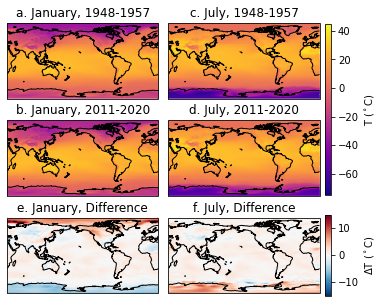

In [9]:
fig=plt.figure(figsize=(7, 4.5))
####
ax11 = fig.add_axes([0.1, 0.7,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
cf=ax11.pcolormesh(Xb,Yb,TMP_NCEP_JAN1.values, transform=ccrs.PlateCarree(),vmin=-75,vmax=45,cmap='plasma',rasterized=True)
ax11.coastlines()

ax11.set_title('a. January, 1948-1957')
####
ax21 = fig.add_axes([0.1, 0.4,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
cf=ax21.pcolormesh(Xb,Yb,TMP_NCEP_JAN2.values, transform=ccrs.PlateCarree(),vmin=-75,vmax=45,cmap='plasma',rasterized=True)
ax21.set_title('b. January, 2011-2020')
ax21.coastlines()
####
ax12 = fig.add_axes([0.42, 0.7,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
cf=ax12.pcolormesh(Xb,Yb,TMP_NCEP_JUL1.values, transform=ccrs.PlateCarree(),vmin=-75,vmax=45,cmap='plasma',rasterized=True)
ax12.coastlines()
ax12.set_title('c. July, 1948-1957')
###
####
ax22 = fig.add_axes([0.42, 0.4,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
cf=ax22.pcolormesh(Xb,Yb,TMP_NCEP_JUL2.values, transform=ccrs.PlateCarree(),vmin=-75,vmax=45,cmap='plasma',rasterized=True)
ax22.coastlines()
ax22.set_title('d. July, 2011-2020')

# add color bar
ax_cb = fig.add_axes([0.73, 0.41,0.0125,0.53])
fig.colorbar(cf, cax=ax_cb, label='T ($^\circ$C)')

########
# calculate difference

delta_TMP_JAN=TMP_NCEP_JAN2-TMP_NCEP_JAN1
delta_TMP_JUL=TMP_NCEP_JUL2-TMP_NCEP_JUL1

####
ax31 = fig.add_axes([0.1, 0.1,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
cf=ax31.pcolormesh(Xb,Yb,delta_TMP_JAN.values, transform=ccrs.PlateCarree(),vmin=-15,vmax=15,cmap='RdBu_r',rasterized=True)
ax31.coastlines()
ax31.set_title('e. January, Difference')

####
ax32 = fig.add_axes([0.42, 0.1,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
cf=ax32.pcolormesh(Xb,Yb,delta_TMP_JUL.values, transform=ccrs.PlateCarree(),vmin=-15,vmax=15,cmap='RdBu_r',rasterized=True)
ax32.coastlines()
ax32.set_title('f. July, Difference')

ax_cb2 = fig.add_axes([0.73, 0.1,0.0125,0.25])
fig.colorbar(cf, cax=ax_cb2, label='$\Delta$T ($^\circ$C)')


fn='Fig_Jan_July_temp_diff_rasterized'
plt.savefig(fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig(fn+'.png',bbox_inches="tight",dpi=300)

plt.show()